In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras

# Load Model    

In [12]:
# Load the model
model = keras.models.load_model('fitmotion_model.keras')

c:\ProgramData\miniconda3\envs\tf_testing\lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 9 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


# Loading The Data

In [16]:
labels = ['dws', 'jog', 'sit', 'std', 'ups', 'wlk']

In [43]:
# Load testing data
data_url = '/jog_9/sub_19.csv'
df = pd.read_csv('dataset' + data_url)
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,-1.039139,-1.232536,2.621413,-0.286038,0.943333,-0.168232,0.278429,-0.591813,-0.526030,-0.354724,0.206706,-0.257809
1,-1.059290,-1.218545,2.614468,-0.300850,0.938598,-0.168879,0.218929,-0.720830,-0.711083,0.060844,-0.038574,-0.243627
2,-1.078749,-1.204224,2.608918,-0.315894,0.933562,-0.169326,0.316419,-0.745103,-0.586457,0.261253,-0.087691,-0.311021
3,-1.087246,-1.191351,2.620142,-0.327936,0.928870,-0.172209,0.587287,-1.061052,-0.398290,0.293848,-0.024375,-0.241304
4,-1.085504,-1.181493,2.645917,-0.335719,0.925174,-0.177043,0.643359,-1.096573,-0.089136,0.302821,0.111783,0.009486
...,...,...,...,...,...,...,...,...,...,...,...,...
5209,1.463028,-1.424794,-1.799679,0.144620,0.989361,-0.015646,0.228084,0.473213,-0.370839,0.023562,-1.097362,0.097433
5210,1.408117,-1.445567,-1.864284,0.123232,0.992169,-0.020226,0.323005,0.316451,-1.475585,0.004987,-1.385296,0.018044
5211,1.307513,-1.477932,-1.963835,0.089508,0.995691,-0.024126,0.064979,-0.323138,-1.678462,0.078644,-1.403055,0.037157
5212,1.266435,-1.505663,-1.996168,0.062056,0.997880,-0.019493,-0.437582,-0.532256,-1.162548,0.031312,-1.098954,0.007866


# Preprocessing Data

In [44]:
# Prepare the data
WINDOW_LENGTH = 150
STRIDE_LENGTH = 10
NUM_CLASSES = 6
NUM_FEATURES = 12
BATCH_SIZE = 100
EPOCHS_SIZE = 10

In [45]:
from scipy.stats import mode

def sequence_generator(x, length, stride):
    seq_x = []
    data_length = len(x)

    for i in range(0, data_length - length + 1, stride):
        input_sequence = x.iloc[i : i + length]
        seq_x.append(input_sequence)
    return np.array(seq_x)

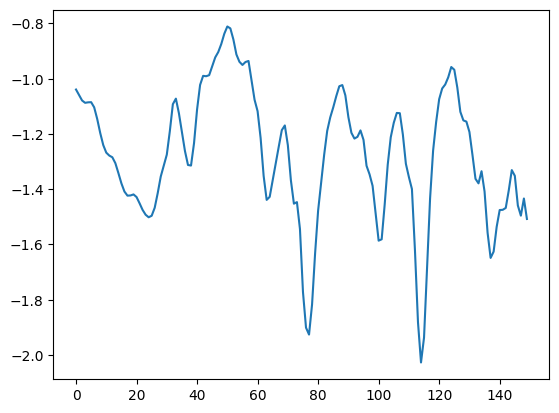

In [46]:
# Checking data
import matplotlib.pyplot as plt

tx = sequence_generator(df, WINDOW_LENGTH, STRIDE_LENGTH)
plt.plot(tx[0][0:150, 0])
plt.show()

# Prediction

In [47]:
# Predict the data
y_pred = model.predict(tx)

# Get the most frequent label
y_pred = np.argmax(y_pred, axis=1)
y_pred = mode(y_pred)[0]
labels[y_pred]

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


'jog'